In [16]:
import sys
sys.path.insert(0,'src/')#change this to your path
from facilityAnalysis import *
from linearRegression import * 
from facility_ABM import *
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
plt.style.use('seaborn-whitegrid')

In [17]:
"""
LOAD AND CLEAN POPULATION INFORMATION
"""
#create population county data frame
COUNTY_SHP_FILE = 'data/UScounties/'
COUNTY_POP_FILE = '/Users/willthompson/Documents/CSDS/DS1/FacilityScaling//data/historical_county_populations.csv'
EPSG=4326

#create a dataframe with population information for each county
df_merged = make_county_pop_df(COUNTY_SHP_FILE,COUNTY_POP_FILE,EPSG)
#get the boundary of the US
boundary_shape = make_boundary(df_merged,EPSG)


In [18]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])
BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_merged['is_banned'] = df_merged.state.isin(BANNED_STATES)
df_merged['pop_banned'] = df_merged['log_pop']
#df_merged[df_merged.state.isin(BANNED_STATES)]['pop_banned'] = 0  
df_merged.loc[df_merged.state.isin(BANNED_STATES),'pop_banned'] = 0

In [19]:
df_pop = pd.read_csv("data/simulated_pop_points.csv")
gdf_pop = gpd.GeoDataFrame(df_pop,geometry = gpd.points_from_xy(df_pop.lon,df_pop.lat)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement
df_state = df_merged.dissolve("state").reset_index().loc[:,['state','geometry']]

In [20]:
lat_col = 'latitude'#CHANGE TO THE NAME OF THE LAT COL IN YOUR DF
lon_col = "longitude"#CHANGE TO THE NAME OF THE LON COL IN YOUR DF
clinic_df = pd.read_csv('data/abortion_data.csv')
clinic_geo_df = create_facility_geo_df(clinic_df,boundary_shape,lat_col=lat_col,lon_col=lon_col).set_crs(4326)
clinic_geo_df = clinic_geo_df.reset_index()

creating facility points from lat lon pairs...
initializing GeoDataFrame...
filtering locations within boundaries


In [21]:
#pop_with_facilty_info = gpd.sjoin(abortion_nearest_facility.set_geometry("nearest_fac"),clinic_geo_df.set_crs(4326)).set_geometry('geometry')

In [22]:
#objective_function/1070

In [23]:
pop_row = gdf_pop.iloc[0]

nearest_fac = nearest(pop_row,df2=clinic_geo_df)


pop_row.geometry.distance(nearest_fac)

1.2735363980015333

<AxesSubplot:>

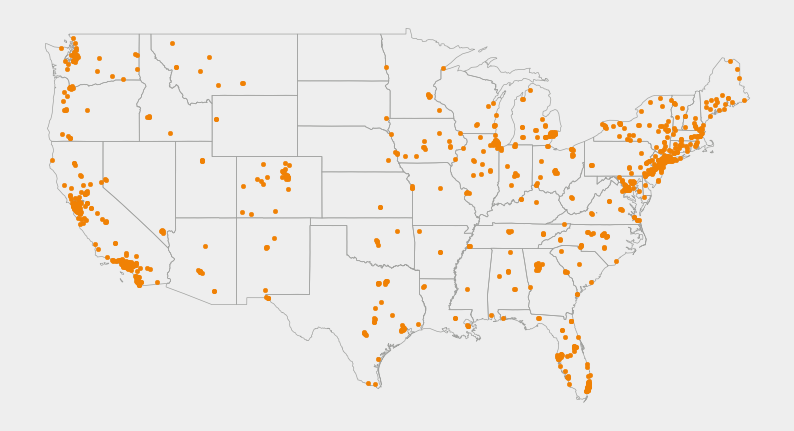

In [24]:
BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 11)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat')

<AxesSubplot:>

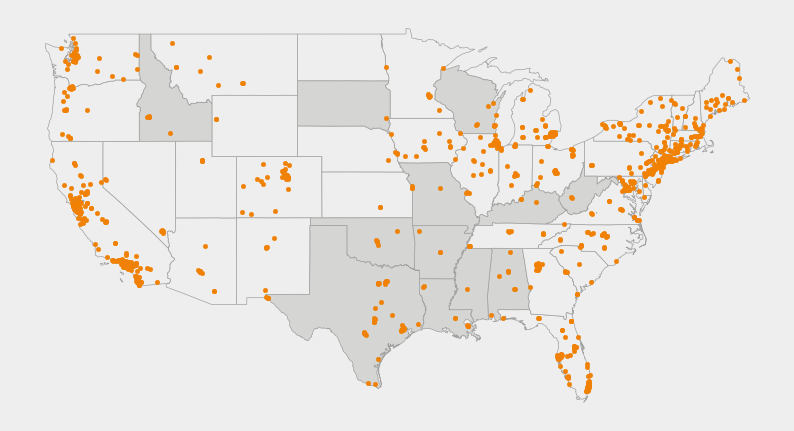

In [25]:

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
BANNED_STATES_ABBREV = ['AK','AL','ID','KY','LA','MS','MO','OK','SD','TN','TX','WV','WI']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

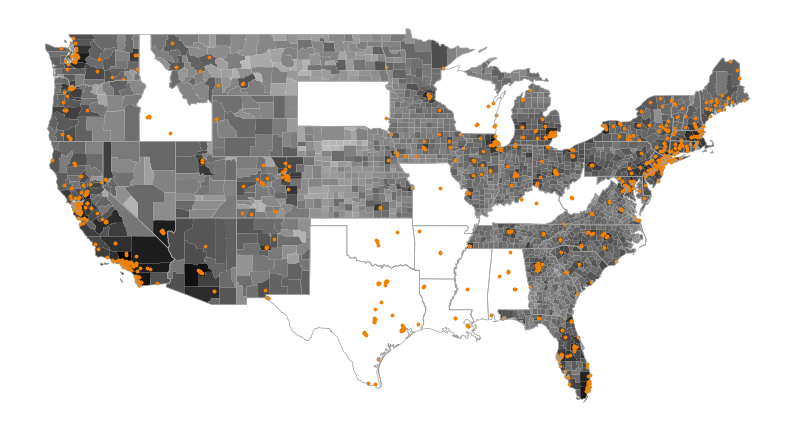

In [26]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
#df_merged.plot(column = 'log_pop',ax = ax)
df_merged.plot(column = 'pop_banned',ax = ax)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_state.plot(ax = ax,facecolor ="none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/abortion_facility_locs_with_pop.svg")

In [27]:
BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_merged['is_banned'] = df_merged.state.isin(BANNED_STATES)
df_merged['pop_banned'] = df_merged['pop_2010']
df_merged[df_merged.state.isin(BANNED_STATES)]['pop_banned'] = -1
df_merged.loc[df_merged.state.isin(BANNED_STATES),'pop_banned'] = -1

/Users/willthompson/miniconda3/envs/myenv/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


AttributeError: 'PatchCollection' object has no property 'columns'

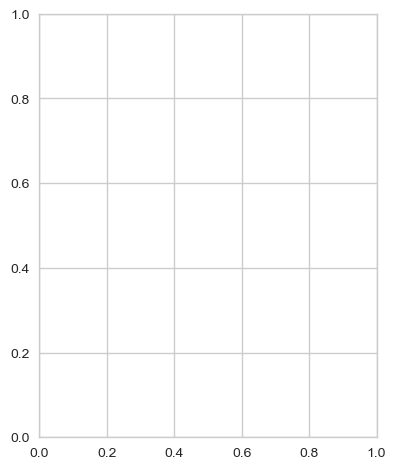

In [28]:
df_merged.plot(columns = 'pop_')

True

## 100 Time Steps

<AxesSubplot:>

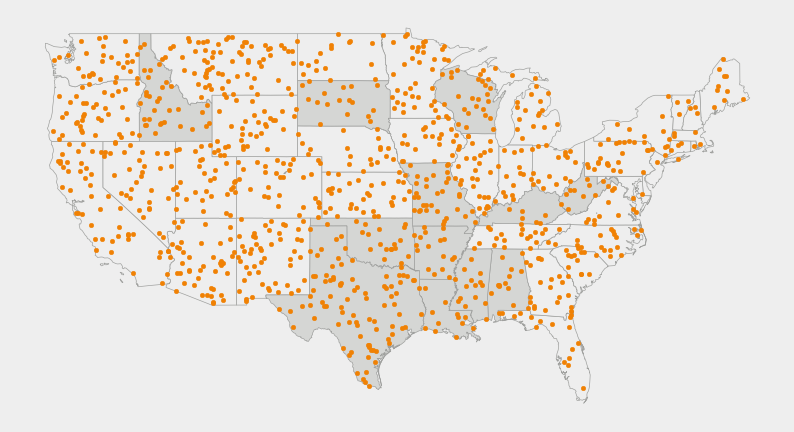

In [ ]:
sim10df = gpd.read_parquet('ind_move_results/all_100steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

calculating voronoi tesselllation
filtering locations by boundary...
calculating voronoi tesselation
calculating voronoi_cell county overlap...
estimating cell population
joining vornoi tesslation to boundary data
print calculating facility and population densities


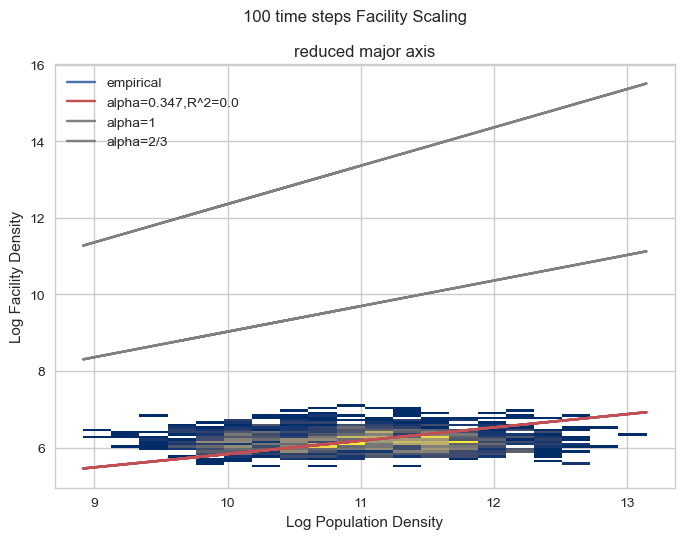

In [ ]:
sim10df = sim10df.reset_index().rename(columns = {'index':'fac_id'})



# best_ind_df = param_df.sort_values(by = 'max_fitness').iloc[-1]['best_ind']
# best_ind_geo_df = create_facility_geo_df(best_ind_df,boundary_shape,lat_col='lat',lon_col='lon').set_crs(4326)
# best_ind_geo_df.reset_index(inplace=True)


#best_ind_geo_df['facility_id'] = best_ind_geo_df['index']
#gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,best_ind_geo_df)
#gdf_pop_nearest_fac =gdf_pop_nearest_fac.to_crs(4326)
#gdf_pop_nearest_fac2 = gpd.GeoDataFrame(gdf_pop_nearest_fac,geometry = gpd.points_from_xy(gdf_pop_nearest_fac.lon_pop,gdf_pop_nearest_fac.lat_pop)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement



MERCATOR_EPSG = 3395 
AREA_EPSG = 6933
voronoi_epsg = MERCATOR_EPSG
area_epsg = AREA_EPSG

population_col = "pop_2010"
cell_index_col= 'fac_id'
fac_density_col = 'fac_density'
pop_density_col = 'pop_density'

"""
Lets calculate the population density and facility density using the voronoi cell method
"""
voronoi_pop_fac_density = calc_voronoi_pop_density_and_fac_density(fac_pos_df_to_voronoi=sim10df,
                                              border_df=df_merged,
                                              cell_index_col =cell_index_col,
                                              population_col=population_col,
                                              voronoi_epsg=MERCATOR_EPSG,                                              
                                              area_epsg=6693)

"""
Perform a least squares regression on the data
"""
ls_reg = LeastSquares()#instantaite a regression object
rma_reg = ReducedMajorAxis()#instantaite a regression object
pop_density_arr = np.log10(voronoi_pop_fac_density['pop_density'].values)
fac_density_arr = np.log10(voronoi_pop_fac_density['fac_density'].values)


#fit the regression to data
ls_reg.fit(pop_density_arr,fac_density_arr)
rma_reg.fit(pop_density_arr,fac_density_arr)

#make the plot
fig,ax = plt.subplots()
make_scaling_plot(rma_reg,ax,"reduced major axis")

plt.suptitle("100 time steps Facility Scaling")
plt.legend()
#plt.savefig("../plots/best_facility_scaling.png",dpi=300)

### 1000 time steps

<AxesSubplot:>

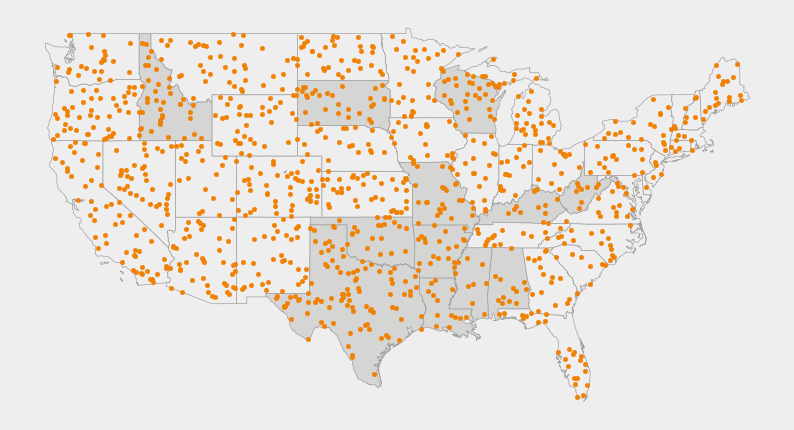

In [ ]:
sim1000df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/output/all_1000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim1000df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

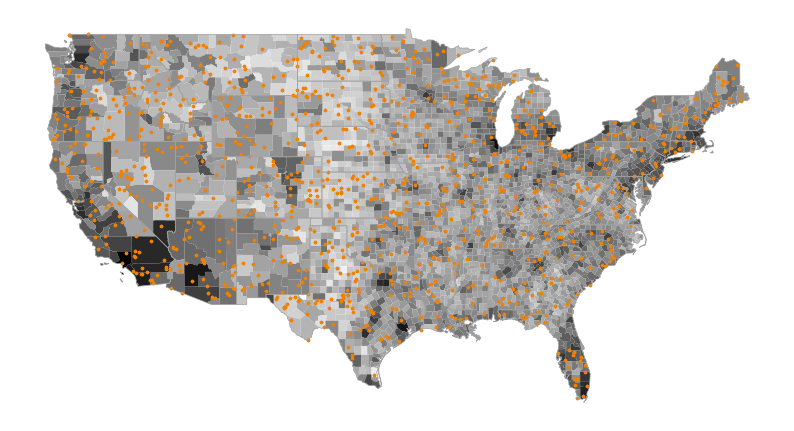

In [ ]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])
sim1000df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/output/all_1000steps_placement.parq')

#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
#df_merged.plot(column = 'log_pop',ax = ax)
df_merged.plot(column = 'log_pop',ax = ax)
sim1000df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
sim1000df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_state.plot(ax = ax,facecolor ="none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/abortion_facility_locs_with_pop.svg")

In [ ]:
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5

## POLITICAL PREFERENCE RESULTS

<AxesSubplot:>

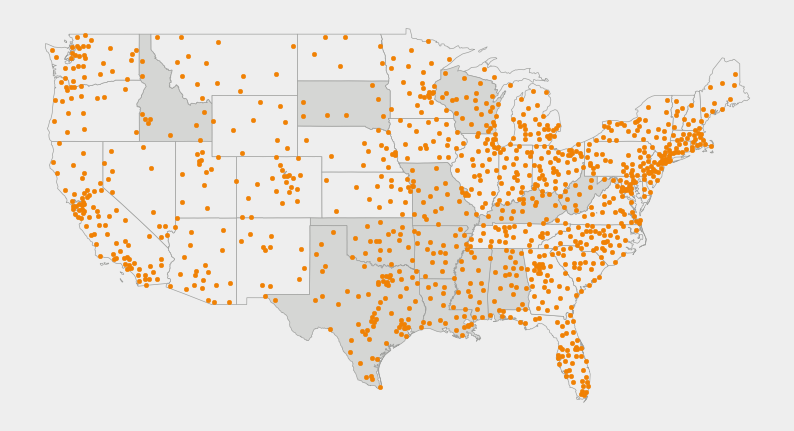

In [ ]:
all_10000steps_pres_weighted40_df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/political_placement_results/all_10000steps_pres_weighted40.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
all_10000steps_pres_weighted40_df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

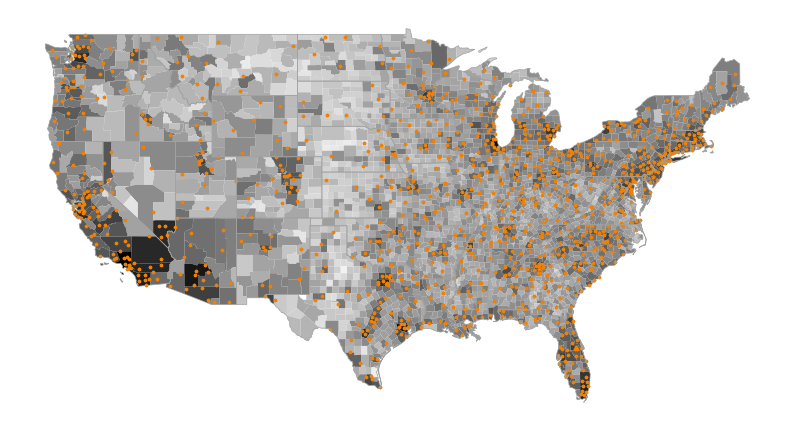

In [ ]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])
all_10000steps_pres_weighted40_df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/output/all_1000steps_placement.parq')
all_10000steps_pres_weighted40_df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/political_placement_results/all_10000steps_pres_weighted40.parq')

#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
#df_merged.plot(column = 'log_pop',ax = ax)
df_merged.plot(column = 'log_pop',ax = ax)
all_10000steps_pres_weighted40_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
all_10000steps_pres_weighted40_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_state.plot(ax = ax,facecolor ="none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/pol_sim_locs.png",dpi=300)

calculating voronoi tesselllation
filtering locations by boundary...
calculating voronoi tesselation
calculating voronoi_cell county overlap...
estimating cell population
joining vornoi tesslation to boundary data
print calculating facility and population densities


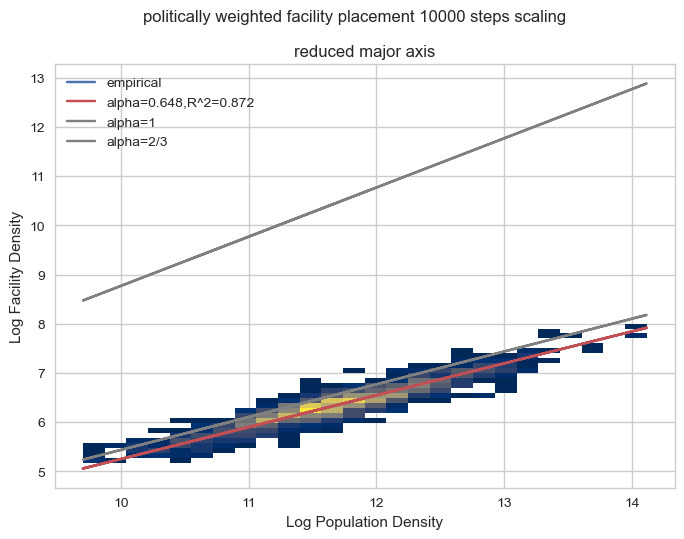

In [ ]:
all_10000steps_pres_weighted40_df = all_10000steps_pres_weighted40_df.reset_index().rename(columns = {'index':'fac_id'})



# best_ind_df = param_df.sort_values(by = 'max_fitness').iloc[-1]['best_ind']
# best_ind_geo_df = create_facility_geo_df(best_ind_df,boundary_shape,lat_col='lat',lon_col='lon').set_crs(4326)
# best_ind_geo_df.reset_index(inplace=True)


#best_ind_geo_df['facility_id'] = best_ind_geo_df['index']
#gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,best_ind_geo_df)
#gdf_pop_nearest_fac =gdf_pop_nearest_fac.to_crs(4326)
#gdf_pop_nearest_fac2 = gpd.GeoDataFrame(gdf_pop_nearest_fac,geometry = gpd.points_from_xy(gdf_pop_nearest_fac.lon_pop,gdf_pop_nearest_fac.lat_pop)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement



MERCATOR_EPSG = 3395 
AREA_EPSG = 6933
voronoi_epsg = MERCATOR_EPSG
area_epsg = AREA_EPSG

population_col = "pop_2010"
cell_index_col= 'fac_id'
fac_density_col = 'fac_density'
pop_density_col = 'pop_density'

"""
Lets calculate the population density and facility density using the voronoi cell method
"""
voronoi_pop_fac_density = calc_voronoi_pop_density_and_fac_density(fac_pos_df_to_voronoi=all_10000steps_pres_weighted40_df,
                                              border_df=df_merged,
                                              cell_index_col =cell_index_col,
                                              population_col=population_col,
                                              voronoi_epsg=MERCATOR_EPSG,                                              
                                              area_epsg=6693)

"""
Perform a least squares regression on the data
"""
ls_reg = LeastSquares()#instantaite a regression object
rma_reg = ReducedMajorAxis()#instantaite a regression object
pop_density_arr = np.log10(voronoi_pop_fac_density['pop_density'].values)
fac_density_arr = np.log10(voronoi_pop_fac_density['fac_density'].values)


#fit the regression to data
ls_reg.fit(pop_density_arr,fac_density_arr)
rma_reg.fit(pop_density_arr,fac_density_arr)

#make the plot
fig,ax = plt.subplots()
make_scaling_plot(rma_reg,ax,"reduced major axis")

plt.suptitle("politically weighted facility placement 10000 steps scaling")
plt.legend()
#plt.savefig("../plots/pol_weighted_scaling.png",dpi=300)

### HPC RESULTS

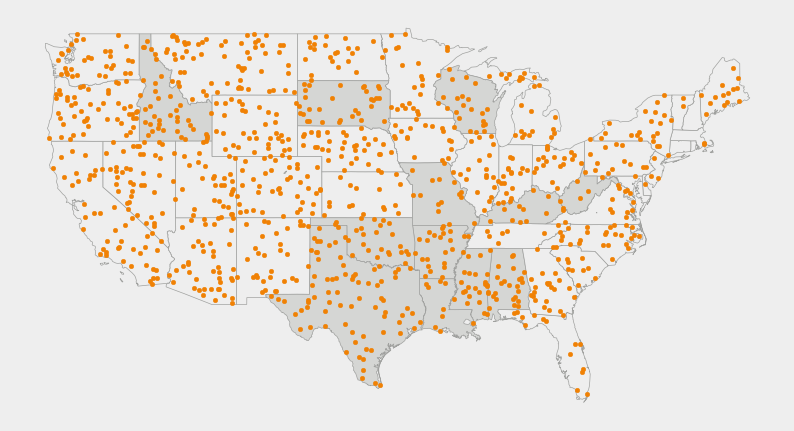

In [ ]:
sim10000df_all = gpd.read_parquet('./output/HPC_data/output/all_10000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10000df_all.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)
plt.savefig("plots/simulated_ind_all_dist.png")

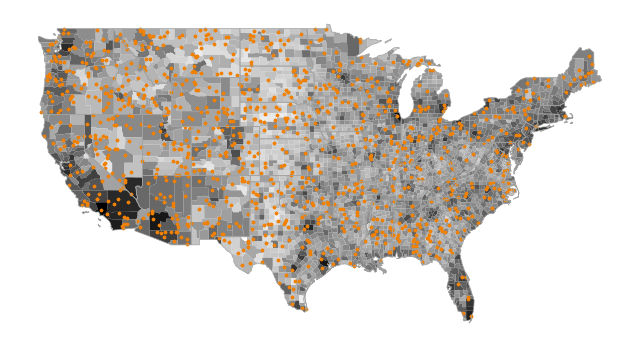

In [ ]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
#df_merged.plot(column = 'log_pop',ax = ax)
df_merged.plot(column = 'log_pop',ax = ax)
sim10000df_all.plot(ax = ax,color = DOT_COLOR,markersize = 5)
sim10000df_all.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_state.plot(ax = ax,facecolor ="none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/simulated_ind_all_dist.png")

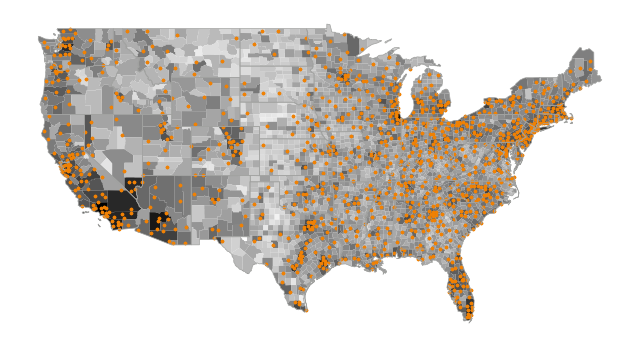

In [ ]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])
all_10000steps_pres_weighted40_df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/output/all_1000steps_placement.parq')
all_10000steps_pres_weighted40_df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/political_placement_results/all_10000steps_pres_weighted40.parq')

#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
#df_merged.plot(column = 'log_pop',ax = ax)
df_merged.plot(column = 'log_pop',ax = ax)
all_10000steps_pres_weighted40_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
all_10000steps_pres_weighted40_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_state.plot(ax = ax,facecolor ="none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/pol_sim_locs.png",dpi=300)

<AxesSubplot:>

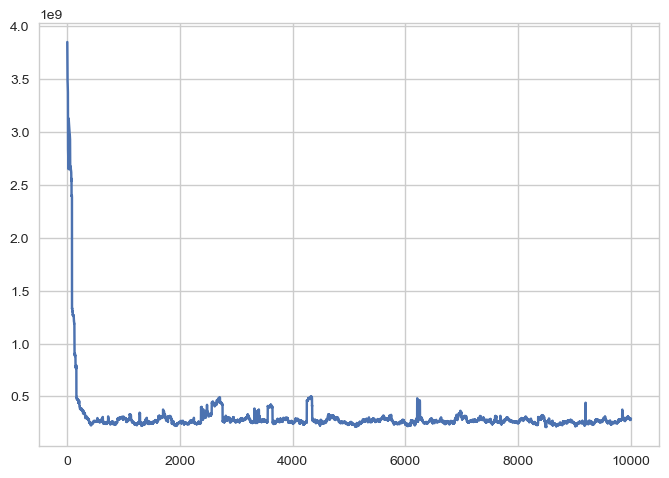

In [ ]:
sim10000df_all_fitness = pd.read_csv('./output/HPC_data/output/legal_10000steps_placement.csv')
sim10000df_all_fitness.total_objective_function.plot()


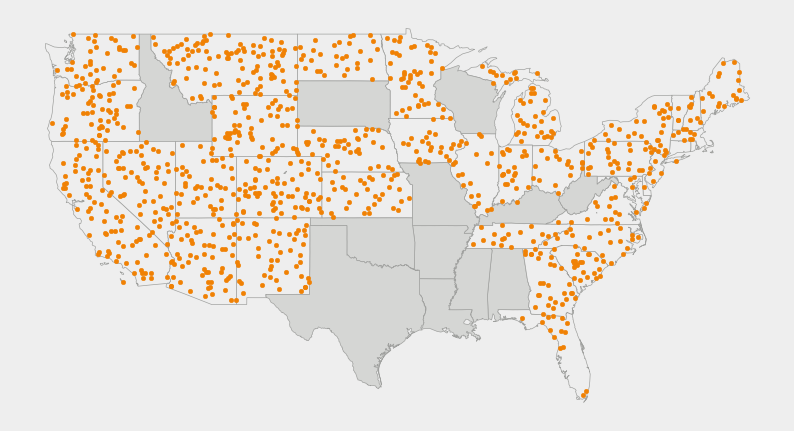

In [ ]:
sim10000df_legal = gpd.read_parquet('./output/HPC_data/output/legal_10000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10000df_legal.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)
plt.savefig("plots/simulated_ind_legal_dist.png")

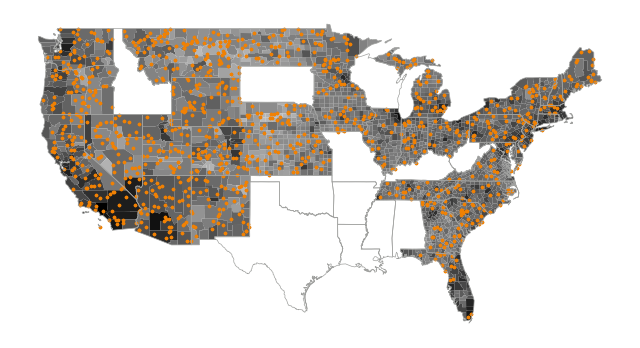

In [ ]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


#fig,ax = plt.subplots(figsize = (10,15))
fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
#df_merged.plot(column = 'log_pop',ax = ax)
df_merged.plot(column = 'pop_banned',ax = ax)
sim10000df_legal.plot(ax = ax,color = DOT_COLOR,markersize = 5)
sim10000df_legal.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_state.plot(ax = ax,facecolor ="none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])

plt.savefig("plots/simulated_ind_legal_dist.png",dpi=300)

<AxesSubplot:>

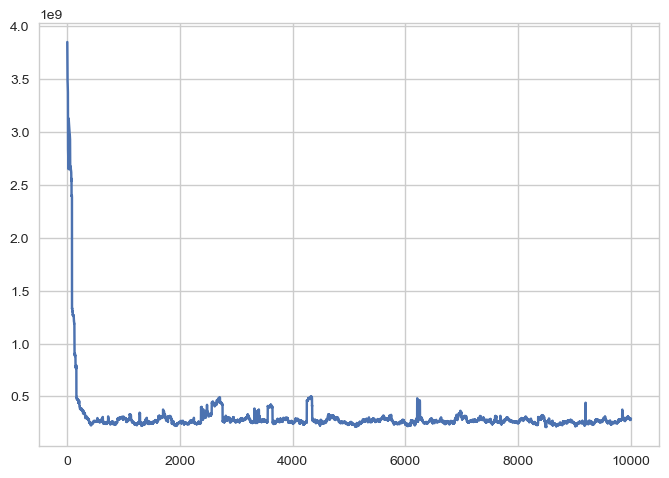

In [ ]:
sim10000df_legal_fitness = pd.read_csv('./output/HPC_data/output/legal_10000steps_placement.csv')
sim10000df_legal_fitness.total_objective_function.plot()

calculating voronoi tesselllation
filtering locations by boundary...
calculating voronoi tesselation
calculating voronoi_cell county overlap...
estimating cell population
joining vornoi tesslation to boundary data
print calculating facility and population densities


FileNotFoundError: [Errno 2] No such file or directory: '../plots/best_facility_scaling_ind_decision.png'

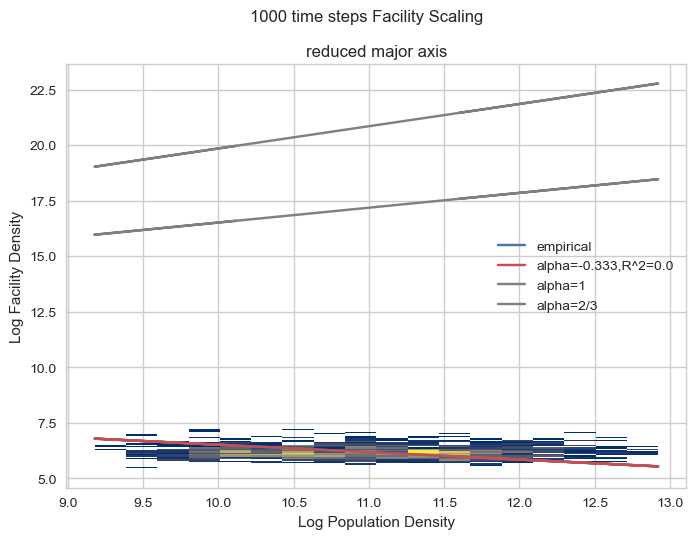

In [ ]:
sim1000df = sim1000df.reset_index().rename(columns = {'index':'fac_id'})



# best_ind_df = param_df.sort_values(by = 'max_fitness').iloc[-1]['best_ind']
# best_ind_geo_df = create_facility_geo_df(best_ind_df,boundary_shape,lat_col='lat',lon_col='lon').set_crs(4326)
# best_ind_geo_df.reset_index(inplace=True)


#best_ind_geo_df['facility_id'] = best_ind_geo_df['index']
#gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,best_ind_geo_df)
#gdf_pop_nearest_fac =gdf_pop_nearest_fac.to_crs(4326)
#gdf_pop_nearest_fac2 = gpd.GeoDataFrame(gdf_pop_nearest_fac,geometry = gpd.points_from_xy(gdf_pop_nearest_fac.lon_pop,gdf_pop_nearest_fac.lat_pop)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement



MERCATOR_EPSG = 3395 
AREA_EPSG = 6933
voronoi_epsg = MERCATOR_EPSG
area_epsg = AREA_EPSG

population_col = "pop_2010"
cell_index_col= 'fac_id'
fac_density_col = 'fac_density'
pop_density_col = 'pop_density'

"""
Lets calculate the population density and facility density using the voronoi cell method
"""
voronoi_pop_fac_density = calc_voronoi_pop_density_and_fac_density(fac_pos_df_to_voronoi=sim1000df,
                                              border_df=df_merged,
                                              cell_index_col =cell_index_col,
                                              population_col=population_col,
                                              voronoi_epsg=MERCATOR_EPSG,                                              
                                              area_epsg=6693)

"""
Perform a least squares regression on the data
"""
ls_reg = LeastSquares()#instantaite a regression object
rma_reg = ReducedMajorAxis()#instantaite a regression object
pop_density_arr = np.log10(voronoi_pop_fac_density['pop_density'].values)
fac_density_arr = np.log10(voronoi_pop_fac_density['fac_density'].values)


#fit the regression to data
ls_reg.fit(pop_density_arr,fac_density_arr)
rma_reg.fit(pop_density_arr,fac_density_arr)

#make the plot
fig,ax = plt.subplots()
make_scaling_plot(rma_reg,ax,"reduced major axis")

plt.suptitle("1000 time steps Facility Scaling")
plt.legend()
plt.savefig("../plots/best_facility_scaling_ind_decision.png",dpi=300)

## Coordinated Movement

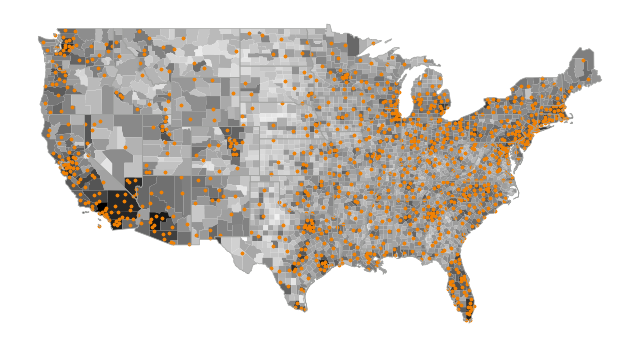

In [ ]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])
all_10000_coord_df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/political_placement_results/all_10000steps_placement.parq')
#all_10000_coord_df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/political_placement_results/all_10000steps_pres_weighted40.parq')

#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
#df_merged.plot(column = 'log_pop',ax = ax)
df_merged.plot(column = 'log_pop',ax = ax)
all_10000_coord_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
all_10000_coord_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_state.plot(ax = ax,facecolor ="none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/all10000_coord_sim.png",dpi=300)

In [ ]:
clinic_geo_df_legal_states = clinic_geo_df[~clinic_geo_df.state.isin(BANNED_STATES_ABBREV)]

In [ ]:
clinic_df

,facility ID,facility name,Unnamed: 2,telehealth clinic only,full address,street address,city,state,zip code,latitude,...,provided MAB in 2021,MAB gestational limit in 2021,median state cost for medication abortion in 2021,provided procedural abortion in 2021,procedural abortion gestational limit in 2021,median state cost for first trimester procedural abortion in 2021,median state cost for second trimester procedural abortion in 2021,date facility opened,facility closure date/info,date of last facility update
0,1,A Affordable Women's Medical Center,NaN,NaN,"7007 N. Freeway, Ste. 225, Houston, TX 77076","7007 N. Freeway, Ste. 225",Houston,TX,77076.0,29.8556,...,NaN,NaN,650.0,NaN,NaN,715,850.0,NaN,2014,12/29/21
1,2,A Capital Women's Health Clinic,NaN,NaN,"1511 Starling Drive, Richmond, VA 23229",1511 Starling Drive,Richmond,VA,23229.0,37.6052,...,Yes,11.0,433.0,Yes,13.6,450,850.0,NaN,NaN,12/21/21 (phone)
2,3,A Caring Choice for Women,NaN,NaN,NaN,NaN,Parker,CO,80134.0,39.5126,...,NaN,NaN,458.0,NaN,NaN,747,2100.0,NaN,NaN,7/14/21
3,4,A Choice For Women,NaN,NaN,"16601 NE 19th Ave, North Miami Beach, FL 33162",16601 NE 19th Ave,North Miami Beach,FL,33162.0,25.9288,...,Yes,9.0,543.0,Yes,20.0,550,650.0,NaN,NaN,12/20/21
4,5,A GYN Diagnostic Center,NaN,NaN,"375 E. 49th St. Suite #2, Hialeah, FL 33013",375 E. 49th St. Suite #2,Hialeah,FL,33013.0,25.8673,...,Yes,8.0,543.0,Yes,22.0,550,650.0,NaN,NaN,12/20/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1249,"Choix, Inc. (IL)",NaN,yes,NaN,NaN,NaN,IL,NaN,NaN,...,Yes,10.0,470.0,No,NaN,480,1385.0,2021,NaN,4/26/2022 based on September 2021 data provide...
1130,1250,Hey Jane (CA),NaN,yes,NaN,NaN,NaN,CA,NaN,NaN,...,Yes,10.0,700.0,No,NaN,750,926.0,2021,NaN,4/26/2022 based on September 2021 data provide...
1131,1251,Hey Jane (NY),NaN,yes,NaN,NaN,NaN,NY,NaN,NaN,...,Yes,10.0,580.0,No,NaN,580,600.0,2021,NaN,4/26/2022 based on September 2021 data provide...
1132,1252,Hey Jane (WA),NaN,yes,NaN,NaN,NaN,WA,NaN,NaN,...,Yes,10.0,650.0,No,NaN,650,NaN,2021,NaN,4/26/2022 based on September 2021 data provide...


In [ ]:
# sim10df['lon'] = sim10df['geometry'].x
# sim10df['lat'] = sim10df['geometry'].y
# sim10df2 = sim10df.reset_index()
# sim10df_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10df2)



# sim1000df['lon'] = sim1000df['geometry'].x
# sim1000df['lat'] = sim1000df['geometry'].y
# sim1000df2 = sim1000df.reset_index()
# sim1000df_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim1000df2)

sim10000df_all['lon'] = sim10000df_all['geometry'].x
sim10000df_all['lat'] = sim10000df_all['geometry'].y
sim10000df_all2 = sim10000df_all.reset_index()
sim10000df_all_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10000df_all2)

sim10000df_legal['lon'] = sim10000df_legal['geometry'].x
sim10000df_legal['lat'] = sim10000df_legal['geometry'].y
sim10000df_legal2 = sim10000df_legal.reset_index()
sim10000df_legal_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10000df_legal2)


all_10000steps_pres_weighted40_df




all_10000_coord_df['lon'] = all_10000_coord_df['geometry'].x
all_10000_coord_df['lat'] = all_10000_coord_df['geometry'].y
all_10000_coord_df2 = all_10000_coord_df.reset_index()
all_10000_coord_df_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,all_10000_coord_df2)

sim10000df_legal['lon'] = sim10000df_legal['geometry'].x
sim10000df_legal['lat'] = sim10000df_legal['geometry'].y
sim10000df_legal2 = sim10000df_legal.reset_index()
sim10000df_legal_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10000df_legal2)

clinic_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,clinic_geo_df)
clinic_gdf_pop_nearest_fac_legal_states = calc_facility_distance(gdf_pop,clinic_geo_df_legal_states)

NameError: name 'sim10000df_all' is not defined

In [ ]:
all_10000_coord_df_gdf_pop_nearest_fac.distance()

,lat_pop,lon_pop,geometry_pop,distance,nearest_fac,level_0,geometry_fac,lon_fac,lat_fac
0,48.001264,-118.639035,POINT (-13206836.941 6107065.147),103093.631471,985,985,POINT (-13283276.022 6037888.824),-119.325699,47.583786
1,48.727736,-117.739398,POINT (-13106689.805 6228789.545),169564.420709,446,446,POINT (-13113229.372 6059351.277),-117.798144,47.713670
2,48.046449,-117.991167,POINT (-13134716.583 6114585.735),59266.733128,446,446,POINT (-13113229.372 6059351.277),-117.798144,47.713670
3,48.497730,-117.988186,POINT (-13134384.782 6190062.504),132412.145644,446,446,POINT (-13113229.372 6059351.277),-117.798144,47.713670
4,47.927439,-117.883483,POINT (-13122729.333 6094791.829),36691.715800,446,446,POINT (-13113229.372 6059351.277),-117.798144,47.713670
...,...,...,...,...,...,...,...,...,...
29978,36.976025,-79.118153,POINT (-8807392.521 4435765.567),8887.398232,970,970,POINT (-8802965.610 4428059.186),-79.078386,36.920700
29979,36.587398,-79.370965,POINT (-8835535.442 4381750.341),3159.229003,535,535,POINT (-8837891.142 4383855.431),-79.392127,36.602580
29980,36.583733,-79.313841,POINT (-8829176.345 4381242.274),9098.146953,535,535,POINT (-8837891.142 4383855.431),-79.392127,36.602580
29981,36.610024,-79.381845,POINT (-8836746.513 4384887.686),1541.339181,535,535,POINT (-8837891.142 4383855.431),-79.392127,36.602580


In [ ]:
# clinic_pop_nearest_fac = calc_facility_distance(gdf_pop,clinic_geo_df)

# #100 steps
# sim10df['lon'] = sim10df['geometry'].x
# sim10df['lat'] = sim10df['geometry'].y
# sim10df.reset_index(inplace=True)
# sim10df_nearest_fac = gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10df)



In [ ]:
#insert all the distance results into dictionaries
test_dict1 = {"kind":"empirical","dobbs":"post Dobbs","distance":clinic_gdf_pop_nearest_fac_legal_states.distance}
test_dict2 = {"kind":"empirical","dobbs":"pre Dobbs","distance":clinic_gdf_pop_nearest_fac.distance}
test_dict3 = {"kind":"simulated_ind","dobbs":"post Dobbs","distance":sim10000df_legal_gdf_pop_nearest_fac.distance}
test_dict4 = {"kind":"simulated_ind","dobbs":"pre Dobbs","distance":sim10000df_all_gdf_pop_nearest_fac.distance}
test_dict5 = {"kind":"simulated_political","dobbs":"pre Dobbs","distance":all_10000steps_pres_weighted40_df_gdf_pop_nearest_fac.distance}
test_dict6 = {"kind":"simulated_coord","dobbs":"pre Dobbs","distance":all_10000_coord_df_gdf_pop_nearest_fac.distance}
#create a distanceframe
df= pd.DataFrame([test_dict1,test_dict2,test_dict3,test_dict4,test_dict5,test_dict6])
#explode to remove lists
df = df.explode("distance")

df.distance = df.distance.astype(int)
df.reset_index(drop = True,inplace=True)

NameError: name 'clinic_gdf_pop_nearest_fac_legal_states' is not defined

<AxesSubplot:xlabel='distance', ylabel='dobbs'>

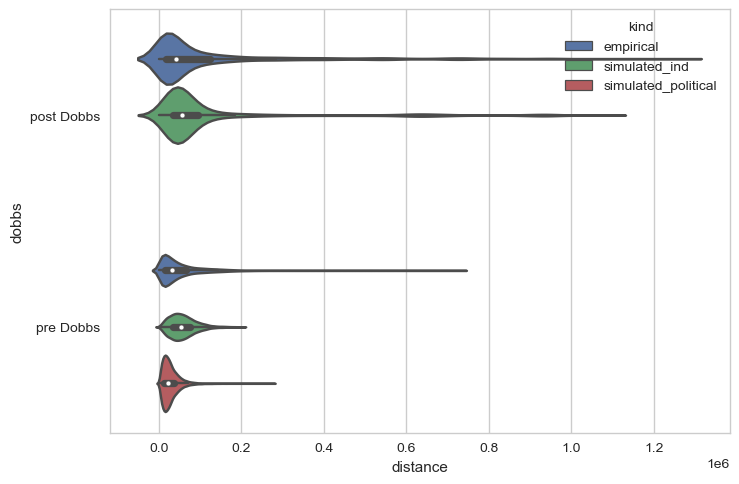

In [ ]:
#df = df.sample(1000)
#plt.xscale('log')
sns.violinplot(data = df,x = 'distance',y = 'dobbs',hue = 'kind')

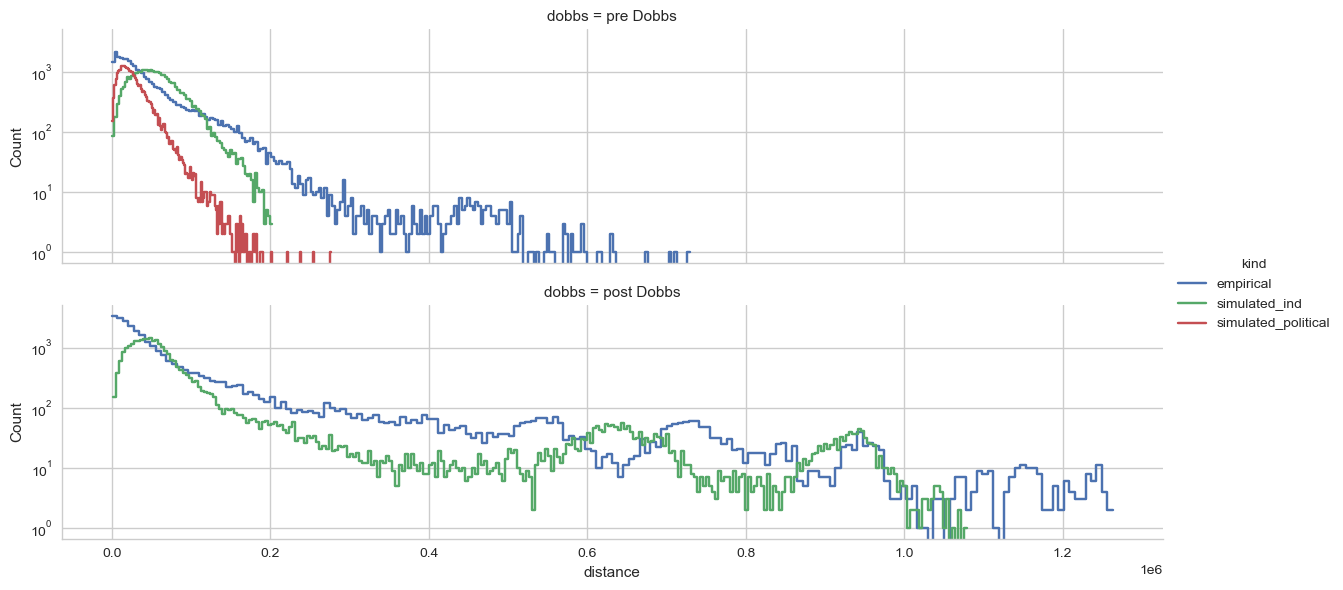

In [ ]:
g = sns.FacetGrid(df,row = 'dobbs',hue = 'kind',aspect=4,sharex=True,row_order=['pre Dobbs','post Dobbs'])
g.map(sns.histplot,'distance',fill=False,element='step')

for ax in g.axes.ravel():
    ax.set(yscale = 'log')
g.add_legend()
plt.savefig("plots/distance_scaling political")

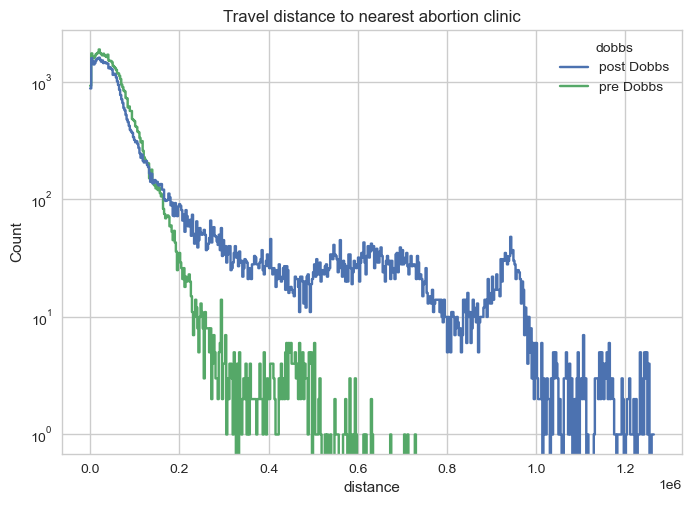

In [ ]:

df_cut = df.query("kind == 'empirical' | kind == 'simulated_ind'")
plt.yscale('log')
sns.histplot(data = df_cut,x = 'distance',hue = 'dobbs',fill=False,element='step')
plt.title("Travel distance to nearest abortion clinic")

plt.savefig("plots/distance_scaling political_empirical_only")

In [ ]:
)


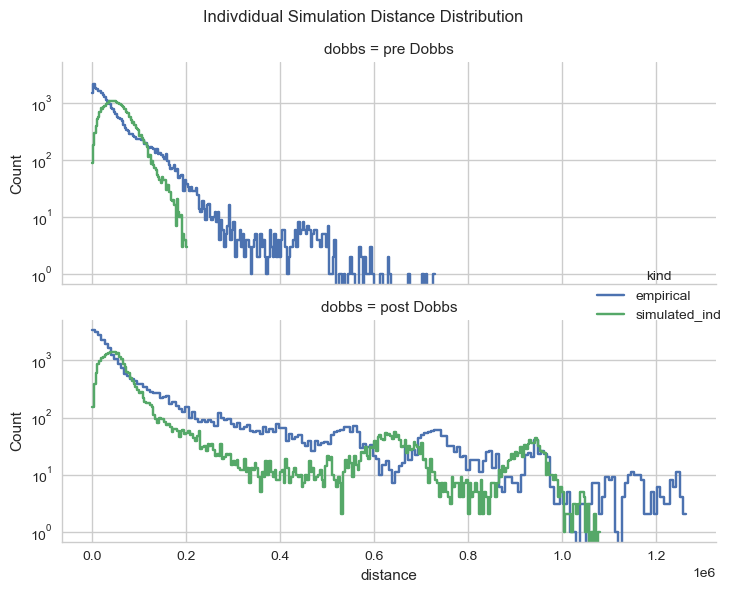

In [ ]:

df_cut = df.query("kind == 'empirical' | kind == 'simulated_ind'")

g = sns.FacetGrid(df_cut,row = 'dobbs',hue = 'kind',aspect=2,sharex=True,row_order=['pre Dobbs','post Dobbs'])
g.map(sns.histplot,'distance',fill=False,element='step')

for ax in g.axes.ravel():
    ax.set(yscale = 'log')
g.add_legend()
#plt.savefig("plots/distance_scaling political")

plt.suptitle("Indivdidual Simulation Distance Distribution")
plt.tight_layout()
plt.savefig("plots/distance_scaling political_simulated_ind_only.png")

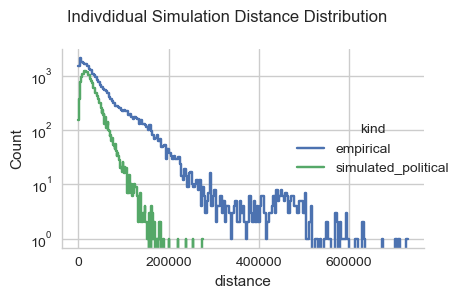

In [ ]:
df_cut = df.query("kind in ('empirical','simulated_political')  & dobbs == 'pre Dobbs'")

g = sns.FacetGrid(df_cut,hue = 'kind',aspect=1,sharex=True,row_order=['pre Dobbs','post Dobbs'])
g.map(sns.histplot,'distance',fill=False,element='step')

for ax in g.axes.ravel():
    ax.set(yscale = 'log')
g.add_legend()
#plt.savefig("plots/distance_scaling political")

plt.suptitle("Indivdidual Simulation Distance Distribution")
plt.tight_layout()
plt.savefig("plots/distance_scaling_political_simulated_ind_only.png",dpi = 300)

AttributeError: 'Rectangle' object has no property 'style'

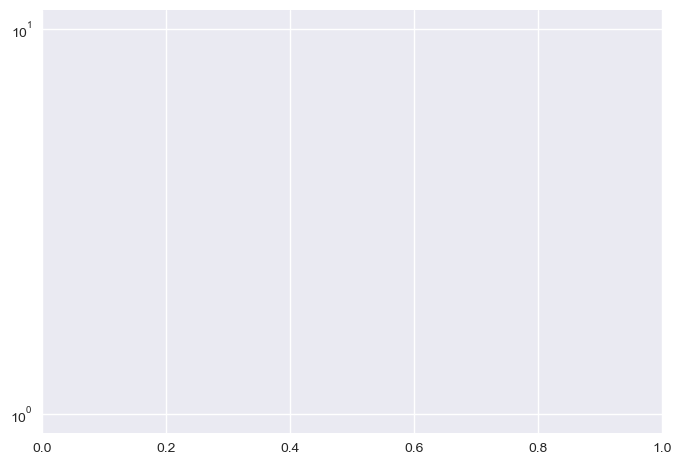

In [ ]:
#df = df.sample(1000)
plt.yscale('log')
#sns.histplot(data = df,y = 'distance',hue = 'kind',histtype='step')
g = sns.FacetGrid(df,col = 'dobbs')

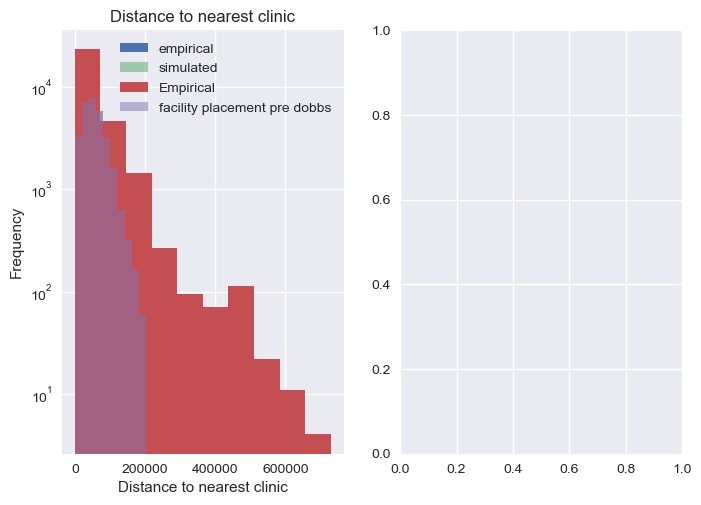

In [ ]:
fig,ax = plt.subplots(ncols = 2)
clinic_gdf_pop_nearest_fac.distance.plot.hist(ax=ax[0],label = 'empirical')
sim10000df_all_gdf_pop_nearest_fac.distance.plot.hist(ax = ax[0],label = 'simulated', alpha = 0.5)




ax[0].legend()
ax[0].set(title = "Distance to nearest clinic", yscale='log',xlabel='Distance to nearest clinic')
#sim10000df_legal_gdf_pop_nearest_fac.distance.plot.hist(ax = ax,label = 'facility placement post dobbs', alpha = 0.5)

clinic_gdf_pop_nearest_fac.distance.plot.hist(ax=ax[0],label = 'Empirical')
sim10000df_all_gdf_pop_nearest_fac.distance.plot.hist(ax = ax[0],label = 'facility placement pre dobbs', alpha = 0.5)
ax[0].legend()
ax[0].set(title = "Distance to nearest clinic", yscale='log',xlabel='Distance to nearest clinic')

#clinic_gdf_pop_nearest_fac_legal_states.distance.plot.hist(ax =ax,label = 'Empirical')
#sim10df_nearest_fac.distance.plot.hist(ax = ax,label = '100 time steps',alpha = 0.5)



plt.savefig("plots/distance_to_nearest_facility")